In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# ast module for abstract syntax grammar
from ast import literal_eval
import ast

%matplotlib inline


In [113]:
# md = The Movies Dataset
# ml = MovieLens 100k Dataset
# sc = self-scraped using OMDBAPI

# The Movies Dataset 
md_movies = pd.read_csv('/Users/user/Downloads/the-movies-dataset/movies_metadata.csv')
md_plots = pd.read_csv('/Users/user/Downloads/the-movies-dataset/keywords.csv')
md_sm_rate = pd.read_csv('/Users/user/Downloads/the-movies-dataset/ratings_small.csv')
md_ratings = pd.read_csv('/Users/user/Downloads/the-movies-dataset/ratings.csv')

# The MovieLens 100k Dataset

# Reading file with user demographics:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
ml_demo = pd.read_csv('/Users/user/Downloads/ml-100k/u.user', sep='|', names=u_cols,encoding='latin-1')

# Reading the file with the ratings
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ml_data = pd.read_csv('/Users/user/Downloads/ml-100k/u.data', sep='\t', names=r_cols,encoding='latin-1')

#Reading items file:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

ml_movies = pd.read_csv('/Users/user/Downloads/ml-100k/u.item', sep='|', names=i_cols,
encoding='latin-1')


# Self scraped movie data using OMDBAPI
sc_data = pd.read_csv('/Users/user/final-capstone/inprogress3.csv')



datasets = [md_movies, md_plots, md_sm_rate, md_ratings, 
           ml_data, ml_movies, ml_demo, sc_data]

/Users/user/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [114]:
for df in datasets:
    print(df.shape)
    df.head()

(45466, 24)
(46419, 2)
(100004, 4)
(26024289, 4)
(100000, 4)
(1682, 24)
(943, 5)
(284303, 25)


# Cleaning - The Movies Dataset

In [115]:
md_movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [116]:
# md_movies, md_plots, md_sm_rate, md_ratings
cols = ['title','original_language','belongs_to_collection','runtime','tagline','budget','revenue',
        'poster_path','genres','production_countries','production_companies','overview','vote_average',
        'vote_count','imdb_id','poster_path','id']
md_movies = md_movies[cols]

md_movies.head()

,title,original_language,belongs_to_collection,runtime,tagline,budget,revenue,poster_path,genres,production_countries,production_companies,overview,vote_average,vote_count,imdb_id,poster_path,id
0,Toy Story,en,"{'id': 10194, 'name': 'Toy Story Collection', ...",81.0,NaN,30000000,373554033.0,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Pixar Animation Studios', 'id': 3}]","Led by Woody, Andy's toys live happily in his ...",7.7,5415.0,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,862
1,Jumanji,en,NaN,104.0,Roll the dice and unleash the excitement!,65000000,262797249.0,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",When siblings Judy and Peter discover an encha...,6.9,2413.0,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,8844
2,Grumpier Old Men,en,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",101.0,Still Yelling. Still Fighting. Still Ready for...,0,0.0,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",A family wedding reignites the ancient feud be...,6.5,92.0,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,15602
3,Waiting to Exhale,en,NaN,127.0,Friends are the people who let you be yourself...,16000000,81452156.0,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",[{'name': 'Twentieth Century Fox Film Corporat...,"Cheated on, mistreated and stepped on, the wom...",6.1,34.0,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,31357
4,Father of the Bride Part II,en,"{'id': 96871, 'name': 'Father of the Bride Col...",106.0,Just When His World Is Back To Normal... He's ...,0,76578911.0,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'id': 35, 'name': 'Comedy'}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Sandollar Productions', 'id': 5842}...",Just when George Banks has recovered from his ...,5.7,173.0,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg,11862


In [117]:
# Convert the 'id' column in both dataframes to numeric
md_movies['id'] =pd.to_numeric(md_movies['id'], errors='coerce', downcast="integer")
md_plots['id'] = pd.to_numeric(md_plots['id'], errors='coerce', downcast="integer")


# Drop null values
md_movies.dropna(subset=["id"],inplace=True)
md_plots.dropna(subset=["id"],inplace=True)


# Merge md_movies and md_plots into md_movies
md_movies = md_movies.merge(md_plots,on=["id"],how="left")

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [118]:
md_movies.shape

(46483, 18)

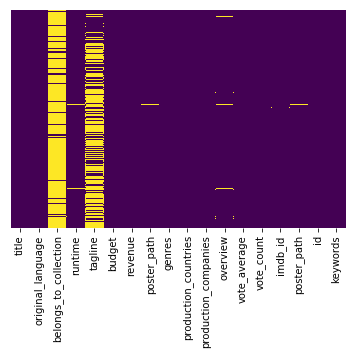

In [119]:
# Check null values

sns.heatmap(md_movies.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [120]:
# more cleaning

md_movies.dropna(subset=['runtime','overview'], inplace=True)
print(md_movies.shape)

md_movies['budget'] = pd.to_numeric(md_movies['budget'], errors='coerce')
md_movies['budget'] = md_movies['budget'].replace(0,np.nan)

md_movies['revenue'] = md_movies['revenue'].replace(0, np.nan)

(45484, 18)


#### Add form of weighted average (IMDB)

* modified the original formula as we don't care if a movie has 0 ratings, add some noise/lambda 0

Weighted rating using IMDb's equation for a true Bayesian estimate: 

$$ (WR) = (vv+m.R) + (mv+m.C)(vv+m.R)+(mv+m.C) $$ 

where:

v = the number of votes for the movie  
m = the minimum votes required to be listed in the database  
R = the average rating of the movie  
C = the mean vote across the whole report  

In [121]:
vote_counts = md_movies[md_movies['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = md_movies[md_movies['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()

m = vote_counts.quantile(0.75)

def weighted_rating(x):
    v = x['vote_count']+1 # added +1 - Dan
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

md_movies['weighted_rating'] = md_movies.apply(weighted_rating, axis=1)

Text(0, 0.5, 'Weighted Rating')

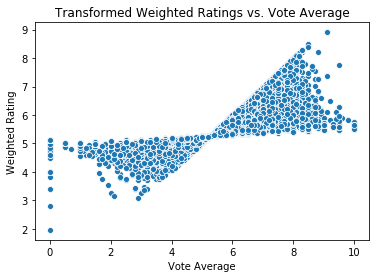

In [122]:
# plot the difference

sns.scatterplot(x='vote_average', y='weighted_rating',data=md_movies)
plt.title('Transformed Weighted Ratings vs. Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Weighted Rating')

#### Genres

* Genres are read as list/dict as type, parse into list and drop the 'ids'

In [123]:
md_movies.head()

,title,original_language,belongs_to_collection,runtime,tagline,budget,revenue,poster_path,genres,production_countries,production_companies,overview,vote_average,vote_count,imdb_id,poster_path,id,keywords,weighted_rating
0,Toy Story,en,"{'id': 10194, 'name': 'Toy Story Collection', ...",81.0,NaN,30000000.0,373554033.0,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Pixar Animation Studios', 'id': 3}]","Led by Woody, Andy's toys live happily in his ...",7.7,5415.0,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,862.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",7.684314
1,Jumanji,en,NaN,104.0,Roll the dice and unleash the excitement!,65000000.0,262797249.0,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",When siblings Judy and Peter discover an encha...,6.9,2413.0,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,8844.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...",6.876519
2,Grumpier Old Men,en,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",101.0,Still Yelling. Still Fighting. Still Ready for...,NaN,NaN,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",A family wedding reignites the ancient feud be...,6.5,92.0,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,15602.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",6.160121
3,Waiting to Exhale,en,NaN,127.0,Friends are the people who let you be yourself...,16000000.0,81452156.0,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",[{'name': 'Twentieth Century Fox Film Corporat...,"Cheated on, mistreated and stepped on, the wom...",6.1,34.0,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,31357.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...",5.678507
4,Father of the Bride Part II,en,"{'id': 96871, 'name': 'Father of the Bride Col...",106.0,Just When His World Is Back To Normal... He's ...,NaN,76578911.0,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'id': 35, 'name': 'Comedy'}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Sandollar Productions', 'id': 5842}...",Just when George Banks has recovered from his ...,5.7,173.0,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg,11862.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",5.625816


In [124]:
# Genres
md_movies['genres'] = md_movies['genres'].fillna('[]').apply(literal_eval).apply(
    lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# Production companies
md_movies['production_countries'] = md_movies['production_countries'].fillna('[]').apply(ast.literal_eval)
md_movies['production_countries'] = md_movies['production_countries'].apply(
    lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# Belongs to collection
md_movies['belongs_to_collection'] = md_movies['belongs_to_collection'].fillna("[]").apply(ast.literal_eval).apply(
    lambda x: x['name'] if isinstance(x, dict) else np.nan)

# Keywords
md_movies['keywords'] = md_movies['keywords'].fillna('[]').apply(literal_eval).apply(
    lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [125]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
md_movies['poster_path'] = "<img src='" + base_poster_url + md_movies['poster_path'] + "' style='height:100px;'>"

In [126]:
md_movies.head()

,title,original_language,belongs_to_collection,runtime,tagline,budget,revenue,poster_path,genres,production_countries,production_companies,overview,vote_average,vote_count,imdb_id,poster_path,id,keywords,weighted_rating
0,Toy Story,en,Toy Story Collection,81.0,NaN,30000000.0,373554033.0,<img src='http://image.tmdb.org/t/p/w185//rhIR...,"[Animation, Comedy, Family]",[United States of America],"[{'name': 'Pixar Animation Studios', 'id': 3}]","Led by Woody, Andy's toys live happily in his ...",7.7,5415.0,tt0114709,<img src='http://image.tmdb.org/t/p/w185//rhIR...,862.0,"[jealousy, toy, boy, friendship, friends, riva...",7.684314
1,Jumanji,en,NaN,104.0,Roll the dice and unleash the excitement!,65000000.0,262797249.0,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[Adventure, Fantasy, Family]",[United States of America],"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",When siblings Judy and Peter discover an encha...,6.9,2413.0,tt0113497,<img src='http://image.tmdb.org/t/p/w185//vzmL...,8844.0,"[board game, disappearance, based on children'...",6.876519
2,Grumpier Old Men,en,Grumpy Old Men Collection,101.0,Still Yelling. Still Fighting. Still Ready for...,NaN,NaN,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[Romance, Comedy]",[United States of America],"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",A family wedding reignites the ancient feud be...,6.5,92.0,tt0113228,<img src='http://image.tmdb.org/t/p/w185//6ksm...,15602.0,"[fishing, best friend, duringcreditsstinger, o...",6.160121
3,Waiting to Exhale,en,NaN,127.0,Friends are the people who let you be yourself...,16000000.0,81452156.0,<img src='http://image.tmdb.org/t/p/w185//16XO...,"[Comedy, Drama, Romance]",[United States of America],[{'name': 'Twentieth Century Fox Film Corporat...,"Cheated on, mistreated and stepped on, the wom...",6.1,34.0,tt0114885,<img src='http://image.tmdb.org/t/p/w185//16XO...,31357.0,"[based on novel, interracial relationship, sin...",5.678507
4,Father of the Bride Part II,en,Father of the Bride Collection,106.0,Just When His World Is Back To Normal... He's ...,NaN,76578911.0,<img src='http://image.tmdb.org/t/p/w185//e64s...,[Comedy],[United States of America],"[{'name': 'Sandollar Productions', 'id': 5842}...",Just when George Banks has recovered from his ...,5.7,173.0,tt0113041,<img src='http://image.tmdb.org/t/p/w185//e64s...,11862.0,"[baby, midlife crisis, confidence, aging, daug...",5.625816


In [127]:
md_movies.columns

Index(['title', 'original_language', 'belongs_to_collection', 'runtime',
       'tagline', 'budget', 'revenue', 'poster_path', 'genres',
       'production_countries', 'production_companies', 'overview',
       'vote_average', 'vote_count', 'imdb_id', 'poster_path', 'id',
       'keywords', 'weighted_rating'],
      dtype='object')

In [128]:
final_cols = ['title','original_language','belongs_to_collection','runtime','tagline','budget','revenue','genres',
             'production_countries','overview','imdb_id','id','keywords','weighted_rating', 'poster_path']

md_movies = md_movies[final_cols]

In [129]:
# md_movies.to_csv('movies-dataset-cleaning-complete-jun6.csv')

In [130]:
md_movies.columns

Index(['title', 'original_language', 'belongs_to_collection', 'runtime',
       'tagline', 'budget', 'revenue', 'genres', 'production_countries',
       'overview', 'imdb_id', 'id', 'keywords', 'weighted_rating',
       'poster_path', 'poster_path'],
      dtype='object')

In [131]:
print(md_movies['overview'][50])
print(md_movies['tagline'][50])

Detective - turned - bodyguard Cynthia McKay (Cynthia Rothrock) is hired by a psychotic icy seductress, Nina Lindell (Lydie Denier), the same woman who killed Mckay's lover months earlier.  With vendetta in her heart McKay accompanies the flamboyantly playful womanizer through the glamourous world of the super-rich as his protector.  In a unique role reversal, it is the woman protecting the man from another woman, erupting into a deadly triangle of passion, suspense and action.
She's no angel of mercy.


#### Final Columns for the Movies Dataset:

* **Title** - Refers to the title of the film (in English). 
* **Original Language** - The original language of the film
* **Belongs to collection** - if the movie is part of a franchise, which franchise
* **Runtime** - Movie Runtime
* **Tagline** - A quick tagline
* **Budget** - The budget of the film
* **Revenue** - What the film made
* **Genres** - Which genres the film falls into
* **Production countries** - countries in which the film was produced
* **Overview** - a quick plot synopsis, sometimes the same and sometimes different from the 'tagline'
* **imdb id** - The ID of the movie on the website IMDB
* **adult** - If the film is X rated or NC-17
* **id** - the movie ID in the dataset, necessary for ratings info
* **keywords** - keywords pulled from movie synopsis
* **weighted rating** - a transformed rating using the imdb rating by users and the number of ratings
* **poster path** - the path to the poster for images



In [132]:
md_movies.head()

,title,original_language,belongs_to_collection,runtime,tagline,budget,revenue,genres,production_countries,overview,imdb_id,id,keywords,weighted_rating,poster_path,poster_path
0,Toy Story,en,Toy Story Collection,81.0,NaN,30000000.0,373554033.0,"[Animation, Comedy, Family]",[United States of America],"Led by Woody, Andy's toys live happily in his ...",tt0114709,862.0,"[jealousy, toy, boy, friendship, friends, riva...",7.684314,<img src='http://image.tmdb.org/t/p/w185//rhIR...,<img src='http://image.tmdb.org/t/p/w185//rhIR...
1,Jumanji,en,NaN,104.0,Roll the dice and unleash the excitement!,65000000.0,262797249.0,"[Adventure, Fantasy, Family]",[United States of America],When siblings Judy and Peter discover an encha...,tt0113497,8844.0,"[board game, disappearance, based on children'...",6.876519,<img src='http://image.tmdb.org/t/p/w185//vzmL...,<img src='http://image.tmdb.org/t/p/w185//vzmL...
2,Grumpier Old Men,en,Grumpy Old Men Collection,101.0,Still Yelling. Still Fighting. Still Ready for...,NaN,NaN,"[Romance, Comedy]",[United States of America],A family wedding reignites the ancient feud be...,tt0113228,15602.0,"[fishing, best friend, duringcreditsstinger, o...",6.160121,<img src='http://image.tmdb.org/t/p/w185//6ksm...,<img src='http://image.tmdb.org/t/p/w185//6ksm...
3,Waiting to Exhale,en,NaN,127.0,Friends are the people who let you be yourself...,16000000.0,81452156.0,"[Comedy, Drama, Romance]",[United States of America],"Cheated on, mistreated and stepped on, the wom...",tt0114885,31357.0,"[based on novel, interracial relationship, sin...",5.678507,<img src='http://image.tmdb.org/t/p/w185//16XO...,<img src='http://image.tmdb.org/t/p/w185//16XO...
4,Father of the Bride Part II,en,Father of the Bride Collection,106.0,Just When His World Is Back To Normal... He's ...,NaN,76578911.0,[Comedy],[United States of America],Just when George Banks has recovered from his ...,tt0113041,11862.0,"[baby, midlife crisis, confidence, aging, daug...",5.625816,<img src='http://image.tmdb.org/t/p/w185//e64s...,<img src='http://image.tmdb.org/t/p/w185//e64s...


#### A little more feature engineering

In [133]:
md_movies.dtypes

title                     object
original_language         object
belongs_to_collection     object
runtime                  float64
tagline                   object
budget                   float64
revenue                  float64
genres                    object
production_countries      object
overview                  object
imdb_id                   object
id                       float64
keywords                  object
weighted_rating          float64
poster_path               object
poster_path               object
dtype: object

In [134]:
# Generate the 'return' on the movie based on budget and what the movie made

md_movies['return'] = md_movies['revenue'] / md_movies['budget']
md_movies[md_movies['return'].isnull()].shape

(40061, 17)

In [135]:
md_movies['return'].isnull().value_counts()

True     40061
False     5423
Name: return, dtype: int64

In [136]:
md_movies.shape

(45484, 17)

We only have 9000 movies out of 46483 (a little less than 20%) of the entire dataset. This is small, but it might give us some key insights into movies. 

In [137]:
qualified = md_movies.sort_values('weighted_rating', ascending=False).head(250)

In [138]:
qualified.head(250)

,title,original_language,belongs_to_collection,runtime,tagline,budget,revenue,genres,production_countries,overview,imdb_id,id,keywords,weighted_rating,poster_path,poster_path,return
10325,Dilwale Dulhania Le Jayenge,hi,NaN,190.0,Come... Fall In Love,13200000.0,1.000000e+08,"[Comedy, Drama, Romance]",[India],"Raj is a rich, carefree, happy-go-lucky second...",tt0112870,19404.0,[musical],8.907024,<img src='http://image.tmdb.org/t/p/w185//2gvb...,<img src='http://image.tmdb.org/t/p/w185//2gvb...,7.575758
314,The Shawshank Redemption,en,NaN,142.0,Fear can hold you prisoner. Hope can set you f...,25000000.0,2.834147e+07,"[Drama, Crime]",[United States of America],Framed in the 1940s for the double murder of h...,tt0111161,278.0,"[prison, corruption, police brutality, prison ...",8.486478,<img src='http://image.tmdb.org/t/p/w185//9O7g...,<img src='http://image.tmdb.org/t/p/w185//9O7g...,1.133659
835,The Godfather,en,The Godfather Collection,175.0,An offer you can't refuse.,6000000.0,2.450664e+08,"[Drama, Crime]",[United States of America],"Spanning the years 1945 to 1955, a chronicle o...",tt0068646,238.0,"[italy, love at first sight, loss of father, p...",8.481270,<img src='http://image.tmdb.org/t/p/w185//rPdt...,<img src='http://image.tmdb.org/t/p/w185//rPdt...,40.844402
41264,Your Name.,ja,NaN,106.0,NaN,NaN,3.552983e+08,"[Romance, Animation, Drama]",[Japan],High schoolers Mitsuha and Taki are complete s...,tt5311514,372058.0,"[supernatural, romance, school, star crossed l...",8.393523,<img src='http://image.tmdb.org/t/p/w185//xq1U...,<img src='http://image.tmdb.org/t/p/w185//xq1U...,NaN
12501,The Dark Knight,en,The Dark Knight Collection,152.0,Why So Serious?,185000000.0,1.004558e+09,"[Drama, Action, Crime, Thriller]","[United Kingdom, United States of America]",Batman raises the stakes in his war on crime. ...,tt0468569,155.0,"[dc comics, crime fighter, secret identity, sc...",8.291345,<img src='http://image.tmdb.org/t/p/w185//1hRo...,<img src='http://image.tmdb.org/t/p/w185//1hRo...,5.430046
2848,Fight Club,en,NaN,139.0,Mischief. Mayhem. Soap.,63000000.0,1.008538e+08,[Drama],"[Germany, United States of America]",A ticking-time-bomb insomniac and a slippery s...,tt0137523,550.0,"[support group, dual identity, nihilism, rage ...",8.289036,<img src='http://image.tmdb.org/t/p/w185//adw6...,<img src='http://image.tmdb.org/t/p/w185//adw6...,1.600853
292,Pulp Fiction,en,NaN,154.0,Just because you are a character doesn't mean ...,8000000.0,2.139288e+08,"[Thriller, Crime]",[United States of America],"A burger-loving hit man, his philosophical par...",tt0110912,680.0,"[transporter, brothel, drug dealer, boxer, mas...",8.287767,<img src='http://image.tmdb.org/t/p/w185//dM2w...,<img src='http://image.tmdb.org/t/p/w185//dM2w...,26.741095
522,Schindler's List,en,NaN,195.0,"Whoever saves one life, saves the world entire.",22000000.0,3.213656e+08,"[Drama, History, War]",[United States of America],The true story of how businessman Oskar Schind...,tt0108052,424.0,"[factory, concentration camp, hero, holocaust,...",8.276184,<img src='http://image.tmdb.org/t/p/w185//yPis...,<img src='http://image.tmdb.org/t/p/w185//yPis...,14.607526
23719,Whiplash,en,NaN,105.0,The road to greatness can take you to the edge.,3300000.0,1.309200e+07,[Drama],[United States of America],"Under the direction of a ruthless instructor, ...",tt2582802,244786.0,"[jazz, obsession, conservatory, music teacher,...",8.275860,<img src='http://image.tmdb.org/t/p/w185//lIv1...,<img src='http://image.tmdb.org/t/p/w185//lIv1...,3.967273
5489,Spirited Away,ja,NaN,125.0,The tunnel led Chihiro to a mysterious town...,15000000.0,2.749251e+08,"[Fantasy, Adventure, Animation, Family]",[Japan],A ten year old girl who wanders away from her ...,tt0245429,129.0,"[witch, parent child relationship, magic, dark...",8.273400,<img src='http://image.tmdb.org/t/p/w185//ynXo...,<img src='http://image.tmdb.org/t/p/w185//ynXo...,18.328340
